## Player Analysis

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [248]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

overall= pd.merge(df1, df2, on='match_id', how='outer')

In [249]:
overall.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [250]:
overall = overall[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'bowler','wide_runs','noball_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

overall.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,ball,batsman,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,1,DA Warner,TS Mills,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,2,DA Warner,TS Mills,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,3,DA Warner,TS Mills,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,4,DA Warner,TS Mills,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,5,DA Warner,TS Mills,2,0,0,2,2,NaN,NaN


### Taking in consideration only CSK VS SRH Matches

In [251]:
DM=overall[np.logical_or(np.logical_and(overall['team1']=='Chennai Super Kings',overall['team2']=='Sunrisers Hyderabad'),
                            np.logical_and(overall['team2']=='Chennai Super Kings',overall['team1']=='Sunrisers Hyderabad'))]

In [252]:
DM.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,ball,batsman,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
97960,414,2013,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,Chennai Super Kings,1,Sunrisers Hyderabad,Chennai Super Kings,...,1,Q de Kock,MM Sharma,0,0,0,0,0,NaN,NaN
97961,414,2013,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,Chennai Super Kings,1,Sunrisers Hyderabad,Chennai Super Kings,...,2,Q de Kock,MM Sharma,0,0,4,0,4,NaN,NaN
97962,414,2013,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,Chennai Super Kings,1,Sunrisers Hyderabad,Chennai Super Kings,...,3,Q de Kock,MM Sharma,0,0,0,0,0,Q de Kock,caught
97963,414,2013,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,Chennai Super Kings,1,Sunrisers Hyderabad,Chennai Super Kings,...,4,GH Vihari,MM Sharma,0,0,0,0,0,NaN,NaN
97964,414,2013,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,Chennai Super Kings,1,Sunrisers Hyderabad,Chennai Super Kings,...,5,GH Vihari,MM Sharma,0,0,1,0,1,NaN,NaN


In [253]:
DM.season.unique() 

array([2013, 2014, 2015, 2018, 2019], dtype=int64)

In [254]:
DM.batsman.unique()

array(['Q de Kock', 'GH Vihari', 'S Dhawan', 'CL White', 'A Mishra',
       'X Thalaivan Sargunam', 'DJG Sammy', 'A Ashish Reddy',
       'MEK Hussey', 'M Vijay', 'SK Raina', 'MS Dhoni', 'DJ Bravo',
       'RA Jadeja', 'CH Morris', 'PA Patel', 'KC Sangakkara',
       'NLTC Perera', 'KV Sharma', 'DW Steyn', 'AJ Finch', 'DA Warner',
       'KL Rahul', 'Y Venugopal Rao', 'DR Smith', 'BB McCullum',
       'F du Plessis', 'M Manhas', 'DJ Hussey', 'NV Ojha', 'RS Bopara',
       'KS Williamson', 'Parvez Rasool', 'MC Henriques', 'EJG Morgan',
       'P Negi', 'SR Watson', 'AT Rayudu', 'R Bhui', 'MK Pandey',
       'DJ Hooda', 'Shakib Al Hasan', 'YK Pathan', 'WP Saha',
       'Rashid Khan', 'A Hales', 'SP Goswami', 'CR Brathwaite', 'B Kumar',
       'DL Chahar', 'Harbhajan Singh', 'SN Thakur', 'KM Jadhav',
       'SW Billings', 'J Bairstow', 'V Shankar'], dtype=object)

### David Warner Performance Analysis

In [255]:
warner = DM[DM["batsman"]=='DA Warner']
batsmen_score = pd.DataFrame(warner.groupby(['season',"match_id","batsman"]).agg({'batsman_runs' : 'sum', 'ball' :'count'}))
batsmen_score

batsman_runs  ball
season match_id batsman                      
2014   474      DA Warner             0     2
       507      DA Warner            90    46
2015   521      DA Warner            53    43
       551      DA Warner            61    28
2019   11324    DA Warner            51    26
       11332    DA Warner            59    47

In [256]:
for value in DM.groupby("batsman"):
    if value[0] == "DA Warner":
        print("Total Runs scored by David Warner against CSK :",value[1]['batsman_runs'].sum())

Total Runs scored by David Warner against CSK : 314


In [257]:
warner = DM[DM["batsman"]=='DA Warner']
warner = warner[warner["player_dismissed"]=="DA Warner"]
warner= warner.groupby("bowler")["player_dismissed"].size()
dismissal = pd.DataFrame(warner)

dismissal

,player_dismissed
bowler,
BW Hilfenhaus,1
DL Chahar,1
Harbhajan Singh,1
IC Pandey,1
JW Hastings,1
SK Raina,1


In [258]:
batsman_name = 'DA Warner'

def batsmen_out_type(batsman_name):
    for value in DM.groupby(['player_dismissed']):
        if value[0] == batsman_name :
            return value[1]['dismissal_kind'].value_counts()

stats = batsmen_out_type(batsman_name)
stats = stats.to_frame().reset_index().rename(columns = {'index' : 'Dismissal Kind' , 'dismissal_kind' : 'Count'})
print("Dismissal Type of David Warner :")
stats

Dismissal Type of David Warner :


,Dismissal Kind,Count
0,caught,3
1,bowled,1
2,lbw,1
3,stumped,1


### Confidence Interval for Warner 's innings

In [259]:
batsmen_score.describe().iloc[[0,1,2,7],:]

,batsman_runs,ball
count,6.000000,6.000000
mean,52.333333,32.000000
std,29.255199,17.285832
max,90.000000,47.000000


In [260]:
mean = batsmen_score["batsman_runs"].mean()
sd = batsmen_score["batsman_runs"].std()
n = len(batsmen_score)

n

6

In [261]:
tstar = 2.064
se = sd/np.sqrt(n)
se

11.943384965931747

In [262]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("Confidence Interval for DA Warner's innings today :{}".format((lcb, ucb)))

Confidence Interval for DA Warner's innings today :(28.0, 77.0)


From all of the above estimations , we can see that David Warner's form against CSK bowlers is quite impressive in recent year. 
So we can predict from here that if David Warner is able to score 30+ runs today then he is expected to go for a long innings.

### CSK Wicket fall down Analysis


In [263]:
wicket = DM[DM["bowling_team"] == "Sunrisers Hyderabad"]
CSK_wickets = pd.DataFrame(wicket.groupby(['season',"match_id","bowling_team"]).agg({'player_dismissed' : 'count'}))
print("CSK wickets fall down against SRH in all matches :")
CSK_wickets.columns = ["Total Wicket Fall of CSK"]
CSK_wickets

CSK wickets fall down against SRH in all matches :


Total Wicket Fall of CSK
season match_id bowling_team                                 
2013   414      Sunrisers Hyderabad                         5
       435      Sunrisers Hyderabad                         3
2014   474      Sunrisers Hyderabad                         5
       507      Sunrisers Hyderabad                         3
2015   521      Sunrisers Hyderabad                         4
       551      Sunrisers Hyderabad                         6
2018   7913     Sunrisers Hyderabad                         3
       7939     Sunrisers Hyderabad                         2
       7950     Sunrisers Hyderabad                         8
       7953     Sunrisers Hyderabad                         2
2019   11324    Sunrisers Hyderabad                         5
       11332    Sunrisers Hyderabad                         4

In [264]:
count = DM.match_id.unique()
count = len(count)
wicket = DM[DM["bowling_team"] == "Sunrisers Hyderabad"]
wkt = wicket["player_dismissed"].count()
print("Total wickets fall of CSK against SRH : {} in {} matches".format(wkt ,count))

Total wickets fall of CSK against SRH : 50 in 12 matches


In [265]:
per_match = wkt/count
per_match = round(per_match)
print("On an average , Per match wicket fall down for CSK :",per_match)

On an average , Per match wicket fall down for CSK : 4.0


### Confidence Interval

In [266]:
CSK_wickets.describe()

,Total Wicket Fall of CSK
count,12.000000
mean,4.166667
std,1.749459
min,2.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,8.000000


In [267]:
mean = CSK_wickets["Total Wicket Fall of CSK"].mean()
sd = CSK_wickets["Total Wicket Fall of CSK"].std()
n = len(CSK_wickets)

n

12

In [268]:
tstar = 2.064
se = sd/np.sqrt(n)
se

0.5050252518939079

In [269]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("Confidence Interval for Total Wicket fall of CSK today :{}".format((lcb, ucb)))

Confidence Interval for Total Wicket fall of CSK today :(3.0, 5.0)


From the above analysis we can predict that CSK has a good record while chasing against SRH . So taking in consideration the past trends only, we predict CSK to loose 3-5 wickets if they will chase based on our analysis.

### Total Runs Scored in the Match Analysis


In [270]:
third = DM[["batting_team","batsman_runs"]]
Each_team_overall_score = pd.DataFrame(third.groupby("batting_team").batsman_runs.sum())

Each_team_overall_score.columns=["Total Runs"]
Each_team_overall_score

,Total Runs
batting_team,
Chennai Super Kings,2034
Sunrisers Hyderabad,1932


In [271]:
count = DM.match_id.unique()
count = len(count)

Total_runs_scored = third.batsman_runs.sum()

Avg_score = Total_runs_scored/(count*2)

print("On an average runs scored in each innnings in CSK VS SRH :",round(Avg_score))

On an average runs scored in each innnings in CSK VS SRH : 165.0


In [272]:
Total_avg = Total_runs_scored/count

print("On an average total runs scored in a match of CSK VS SRH :" , round(Total_avg))

On an average total runs scored in a match of CSK VS SRH : 330.0


From the above analysis we can predict total score to be scored today will be around 330 if the trend is continued

### Wide Balls Analysis

In [273]:
wides = DM.where(DM["wide_runs"] >0)

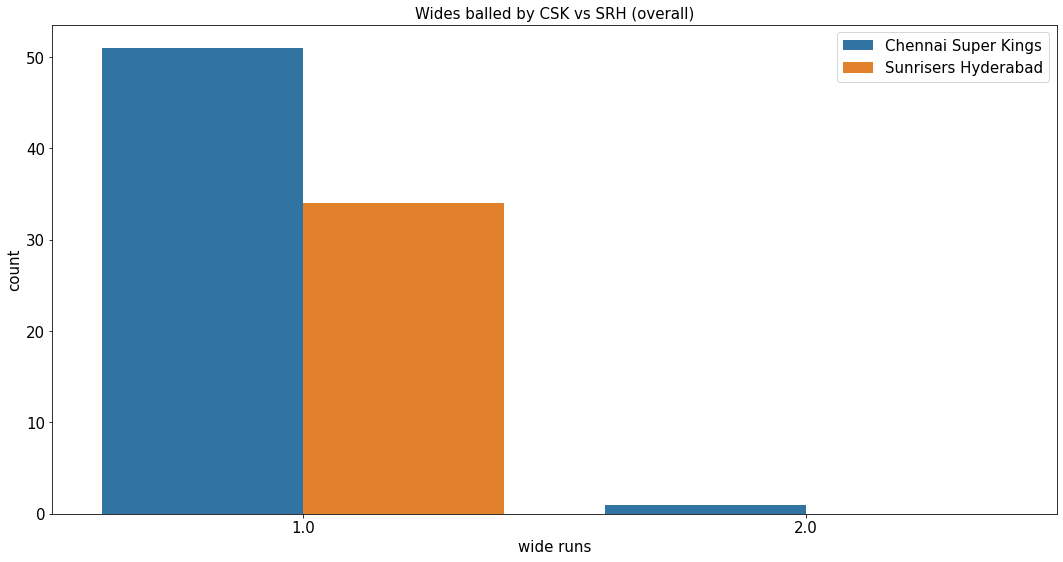

In [277]:
plt.figure(figsize = (18,9))
sns.countplot(wides['wide_runs'],hue=DM['bowling_team'])
plt.title("Wides balled by CSK vs SRH (overall)",fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('wide runs',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.legend(loc=1,fontsize=15)

In [275]:
cond2 = DM["season"] == 2018
cond3 = DM["season"] == 2019
final = DM[cond2 | cond3]

wides2 = final.where(final["wide_runs"] >0)

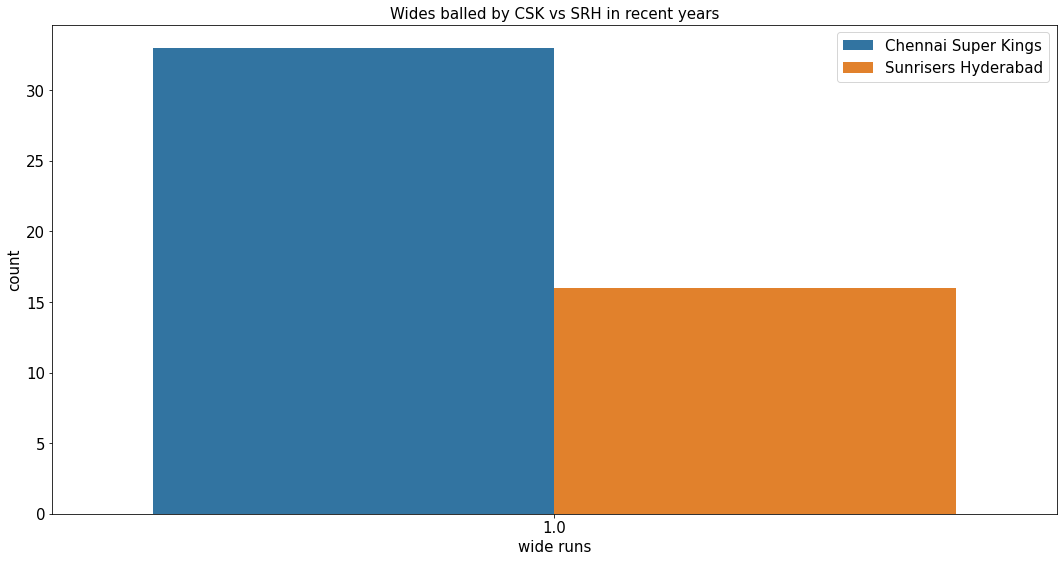

In [276]:
plt.figure(figsize = (18,9))
sns.countplot(wides2['wide_runs'],hue=DM['bowling_team'])
plt.title("Wides balled by CSK vs SRH in recent years",fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('wide runs',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.legend(loc=1,fontsize=15)

 From the above plot we can see that large no of runs from wides are given .
 So based on the past trend of wides we predict that 6-8 wides to be balled in today's match also. 